# 2.2

In [218]:
#librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SelectFromModel
from sklearn.linear_model import Lasso


In [219]:
#carga de datos
df = pd.read_csv('./data/high_diamond_ranked_10min.csv')


In [220]:
#exploracion de datos
#mostrar las columanas
print("\n--Columnas:---")
print(list(df.columns))

# Para saber si el dataset esta balanceado
print("- - - - - - - BALANCEO - - - - - - -")
balanceo = df["blueWins"].value_counts()
print(df["blueWins"].value_counts())

p0 = balanceo[0]/(balanceo[0]+balanceo[1])
p1 = balanceo[1]/(balanceo[0]+balanceo[1])

print("Proporcion de 0s: ", p0)
print("Proporcion de 1s: ", p1)

print("Como se puede evidenciar ambos resultados son aproximadamente 0.5 por lo tanto se puede decir que el dataset esta balanceado ")

#resumen del set de datos
print("\n--Resumen del set de datos:--")
print(df.describe())



--Columnas:---
['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
- - - - - - - BALANCEO - - - - - - -
blueWins
0    4949
1    4930
Name: count, dtype: int64
Proporcion de 0s:  0.5009616357930965
Proporcion de 1s:  0.4990383642069035
Como se puede evidenciar ambos resultados son aproximadamente 0.5 por lo tanto se puede de

In [221]:
#obtener el tipo de datos
print("\n----Tipo de datos:---")
print(df.dtypes)
tipos_de_datos = df.dtypes.value_counts()
print('resumen:')
print(tipos_de_datos)


----Tipo de datos:---
gameId                            int64
blueWins                          int64
blueWardsPlaced                   int64
blueWardsDestroyed                int64
blueFirstBlood                    int64
blueKills                         int64
blueDeaths                        int64
blueAssists                       int64
blueEliteMonsters                 int64
blueDragons                       int64
blueHeralds                       int64
blueTowersDestroyed               int64
blueTotalGold                     int64
blueAvgLevel                    float64
blueTotalExperience               int64
blueTotalMinionsKilled            int64
blueTotalJungleMinionsKilled      int64
blueGoldDiff                      int64
blueExperienceDiff                int64
blueCSPerMin                    float64
blueGoldPerMin                  float64
redWardsPlaced                    int64
redWardsDestroyed                 int64
redFirstBlood                     int64
redKills         

### Variables:
gameId : id del juego     

blueWins : indica si el equipo azul ganó la partida (1) o perdió (0).

WardsPlaced: Cantidad de wards colocadas en el mapa por el equipo. Las wards proporcionan visión del entorno, permitiendo ver a los enemigos.

WardsDestroyed: Cantidad de wards enemigas destruidas por el equipo.

FirstBlood: Indica si el equipo obtuvo la primera muerte en la partida (1) o no (0).

Kills: Número total de campeones enemigos asesinados por el equipo.

Deaths: Número total de veces que los campeones del equipo fueron asesinados.

Assists: Número de veces que un campeón del equipo ayudó a asegurar una muerte de un campeón enemigo.

EliteMonsters: Número total de "monstruos élite" (Dragones, Barones y Heraldos de la Grieta) asesinados por el equipo. Estos monstruos proporcionan poderosas mejoras al equipo que los mata.

Dragons: Número de Dragones asesinados por el equipo.

Heralds: Número de Heraldos de la Grieta asesinados por el equipo.

TowersDestroyed: Número de torres enemigas destruidas por el equipo. Las torres son estructuras defensivas que deben ser destruidas para avanzar hacia el Nexo enemigo.

TotalGold: Cantidad total de oro obtenido por el equipo durante la partida. El oro se utiliza para comprar objetos que mejoran las habilidades de los campeones.

AvgLevel: Nivel promedio de todos los campeones del equipo. Los campeones ganan experiencia durante la partida y suben de nivel, aumentando su poder.

TotalExperience: Cantidad total de experiencia obtenida por el equipo.

TotalMinionsKilled: Número total de súbditos enemigos asesinados por el equipo. Los súbditos son unidades controladas por la IA que luchan constantemente. Asesinar súbditos es la principal fuente de oro y experiencia.

TotalJungleMinionsKilled: Número total de monstruos de la jungla asesinados por el equipo. Los monstruos de la jungla son criaturas neutrales que residen en la zona de la jungla del mapa. Asesinarlos proporciona oro, experiencia y mejoras.               

In [222]:
# Buscando valores nulls
print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))

- - - - - - - VALORES NULLS - - - - - - -
      gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0      False     False            False               False           False   
1      False     False            False               False           False   
2      False     False            False               False           False   
3      False     False            False               False           False   
4      False     False            False               False           False   
...      ...       ...              ...                 ...             ...   
9874   False     False            False               False           False   
9875   False     False            False               False           False   
9876   False     False            False               False           False   
9877   False     False            False               False           False   
9878   False     False            False               False           False   

      blu

El output muestra que no hay columnas con los datos nulos.

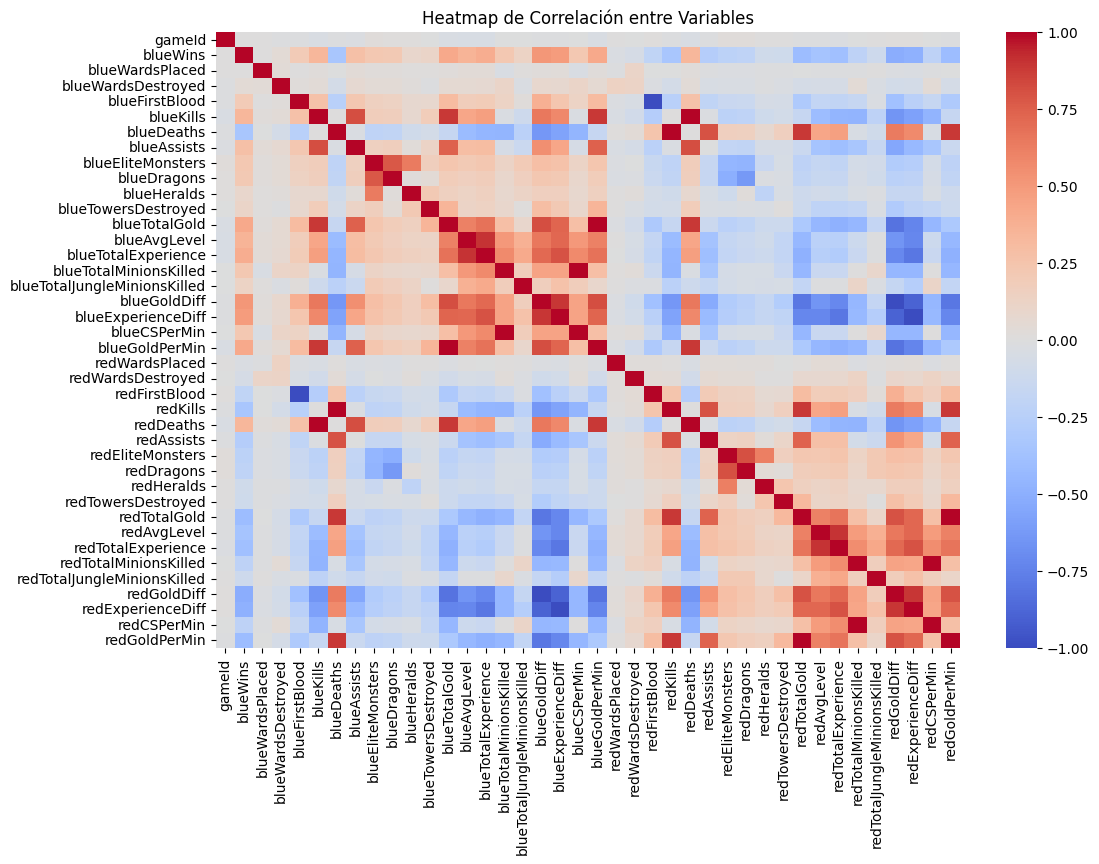

In [223]:
# Calcular matriz de correlación
correlation_matrix = df.corr()

# Graficar el heatmap de correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")

plt.title("Heatmap de Correlación entre Variables")
plt.show()

### Modelo SVM


Parte del laboratorio pasado:

In [224]:
subset = df[["blueGoldDiff", "blueTotalGold", "blueWins", "blueExperienceDiff"]]

X = subset.drop(columns=["blueWins"])
y = subset["blueWins"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (7903, 3), (7903,)
Validation shape: (988, 3), (988,)
Test shape: (988, 3), (988,)


encontrar el mejor parametro de regularization

In [225]:
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.48
Valor: 0.000006 - Precisión en Validación: 0.48
Valor: 0.000036 - Precisión en Validación: 0.69
Valor: 0.000215 - Precisión en Validación: 0.72
Valor: 0.001292 - Precisión en Validación: 0.72
Valor: 0.007743 - Precisión en Validación: 0.72
Valor: 0.046416 - Precisión en Validación: 0.72
Valor: 0.278256 - Precisión en Validación: 0.72
Valor: 1.668101 - Precisión en Validación: 0.72
Valor: 10.000000 - Precisión en Validación: 0.72
Mejor Valor encontrado: 10.000000


resultados

Precisión en Test con C=10.000000: 0.73
Precisión en Test (Accuracy): 0.73
Precisión (Precision): 0.73
Recall (Sensibilidad): 0.71

Matriz de Confusión:
[[375 130]
 [140 343]]


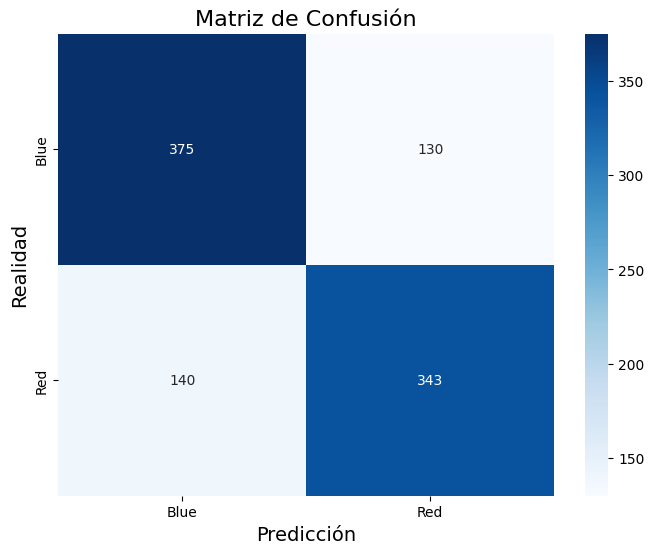

In [226]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print(f"Precisión en Test (Accuracy): {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()



-------------------------------------------------------------

### Uso de f_classification (Univariado) 
este se usa porque hace el analisis de varianza para seleccionar las caracteristicas mas relevantes en un problema de clasificacion. Si la varianza es alta, significa que esa característica contribuye significativamente a separar las clases, por lo tanto, es más importante.

las catacteristicas seleccionadas son:  Index(['blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')


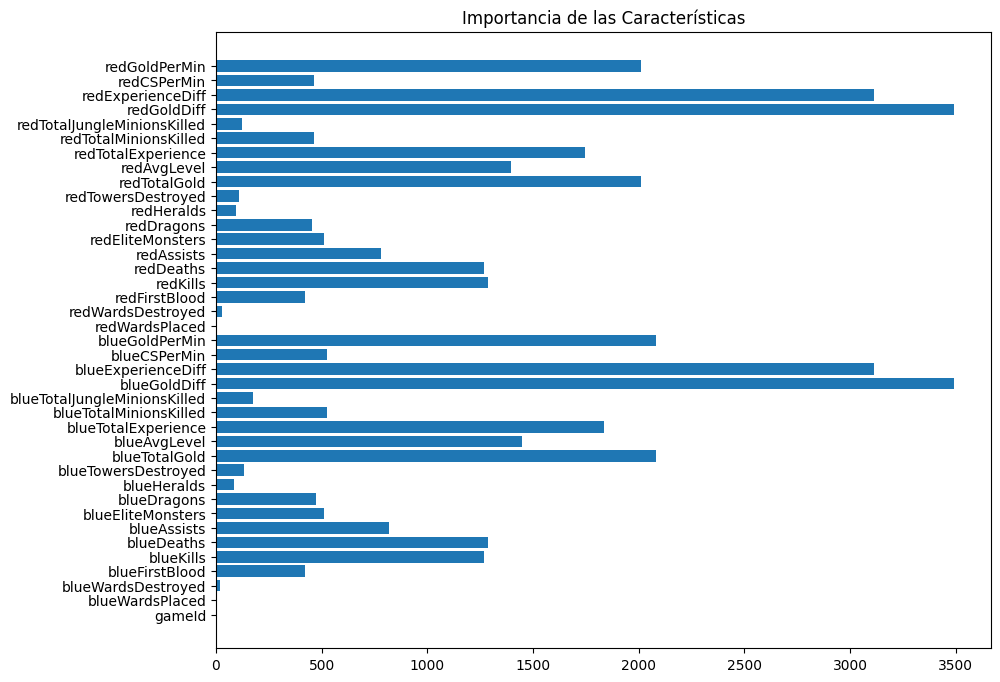

In [227]:
#seleccion de catacteristicas
X = df.drop(columns=["blueWins"])
y = df["blueWins"]


selector= SelectKBest(f_classif, k=4) #seleccionar las mejores caracteristicas
selector.fit(X, y) #ajustar el selector de datos

features_Selected = selector.get_support(indices=True)
features_Selected_names = X.columns[features_Selected]
print("las catacteristicas seleccionadas son: ", features_Selected_names)

#grafico de la importancia de la categoria
plt.figure(figsize=(10, 8))
plt.barh(X.columns, selector.scores_)
plt.title("Importancia de las Características")
plt.show()


In [228]:
X_new = selector.fit_transform(X, y)
print(X_new.shape)

X_train, X_temp, y_train, y_temp = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_val = scaler.transform(X_val) 
X_test = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, {y_train.shape}")
print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

(9879, 4)
Train shape: (7903, 4), (7903,)
Validation shape: (988, 4), (988,)
Test shape: (988, 4), (988,)


In [229]:
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.48
Valor: 0.000006 - Precisión en Validación: 0.48
Valor: 0.000036 - Precisión en Validación: 0.72
Valor: 0.000215 - Precisión en Validación: 0.72
Valor: 0.001292 - Precisión en Validación: 0.72
Valor: 0.007743 - Precisión en Validación: 0.72
Valor: 0.046416 - Precisión en Validación: 0.72
Valor: 0.278256 - Precisión en Validación: 0.72
Valor: 1.668101 - Precisión en Validación: 0.72
Valor: 10.000000 - Precisión en Validación: 0.72
Mejor Valor encontrado: 0.278256


Precisión en Test con C=0.278256: 0.73
Precisión en Test (Accuracy): 0.73
Precisión (Precision): 0.73
Recall (Sensibilidad): 0.71

Matriz de Confusión:
[[375 130]
 [140 343]]


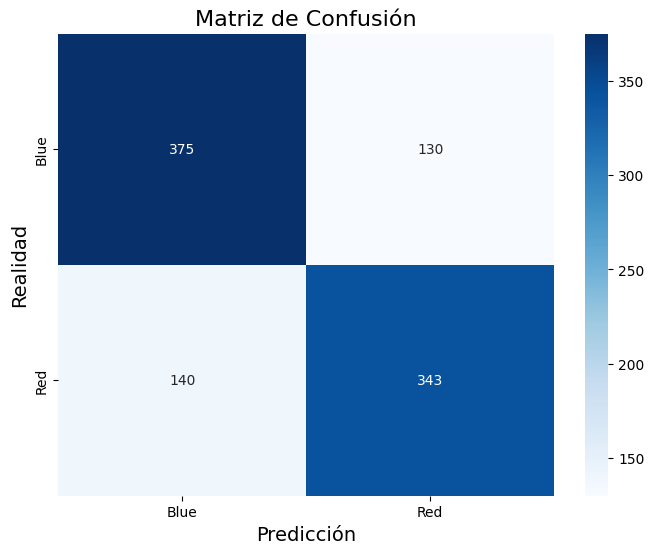

In [230]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print(f"Precisión en Test (Accuracy): {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()


-------------------------------------------------------------

### Uso de Regresion Lasso (Metodo Embedded)

Index(['gameId', 'blueGoldDiff', 'blueExperienceDiff', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')


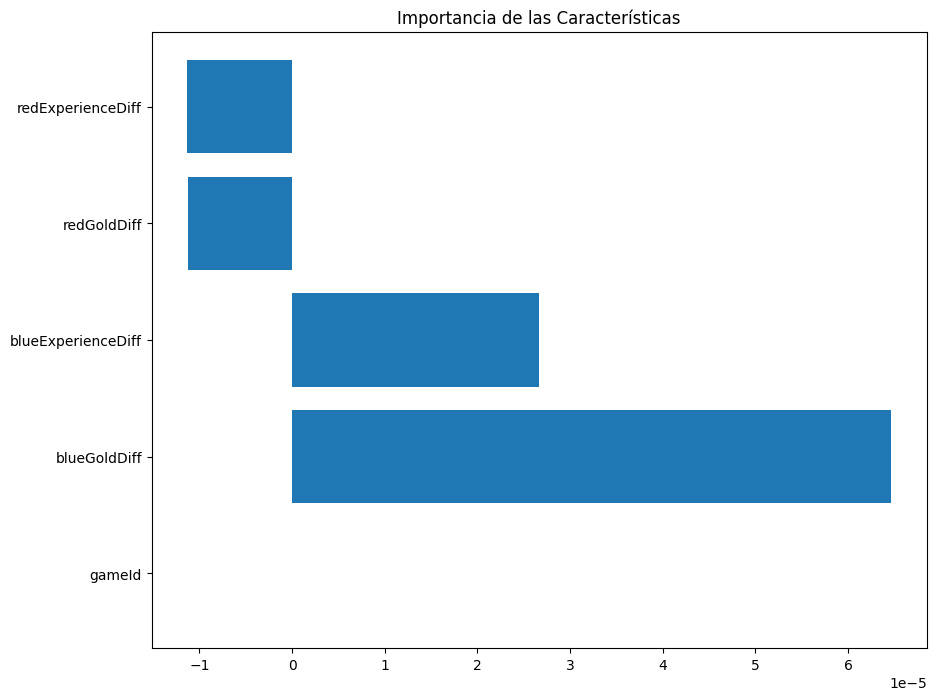

In [231]:
#crear un modelo lasso
lasso = Lasso(alpha=10)

#ajustar el modelo con los datos
lasso.fit(X, y)

#selecionar las caracteristicas importantes
mask = lasso.coef_ != 0

#mostrar las caracteristicas importantes
print(X.columns[mask])

#grafico de la importancia de la categoria
plt.figure(figsize=(10, 8))
plt.barh(X.columns[mask], lasso.coef_[mask])
plt.title("Importancia de las Características")
plt.show()



In [232]:
#selecionar las caracteristicas importantes
X_new = X[X.columns[mask]]

X_train, X_temp, y_train, y_temp = train_test_split(X_new, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, {y_train.shape}")

print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")


Train shape: (7903, 5), (7903,)
Validation shape: (988, 5), (988,)
Test shape: (988, 5), (988,)


In [233]:
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.48
Valor: 0.000006 - Precisión en Validación: 0.48
Valor: 0.000036 - Precisión en Validación: 0.72
Valor: 0.000215 - Precisión en Validación: 0.71
Valor: 0.001292 - Precisión en Validación: 0.72
Valor: 0.007743 - Precisión en Validación: 0.72
Valor: 0.046416 - Precisión en Validación: 0.72
Valor: 0.278256 - Precisión en Validación: 0.72
Valor: 1.668101 - Precisión en Validación: 0.72
Valor: 10.000000 - Precisión en Validación: 0.72
Mejor Valor encontrado: 0.278256


Precisión en Test con C=0.278256: 0.72
Precisión en Test (Accuracy): 0.72
Precisión (Precision): 0.72
Recall (Sensibilidad): 0.71

Matriz de Confusión:
[[371 134]
 [141 342]]


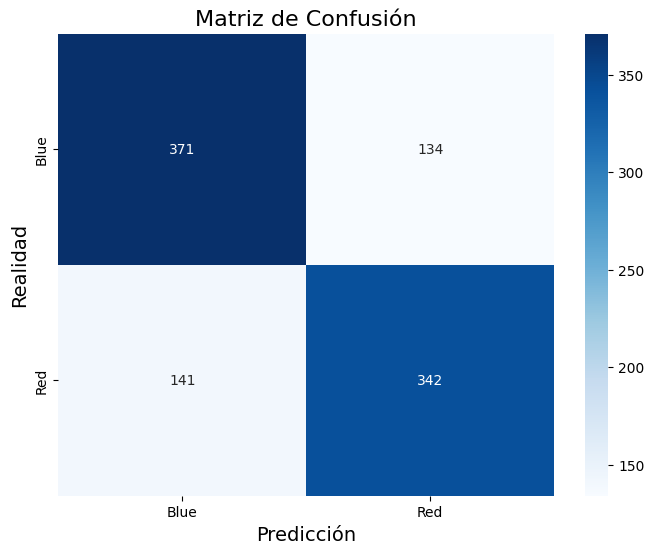

In [234]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print(f"Precisión en Test (Accuracy): {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()

----------------------------------------------------------

### Uso de la correlacion de Pearson (Metodo de filtrado)

In [235]:
corr_matriz = df.corr()
corr_with_target = corr_matriz["blueWins"].abs().sort_values(ascending=False)
print(corr_with_target)

#seleccionar las caracteristicas con una correlacion alta con la variable objetivo
features_selected_corr = corr_with_target[(corr_with_target.abs() > 0.45) & (corr_with_target.abs() < 0.95)].index
print(features_selected_corr)


blueWins                        1.000000
blueGoldDiff                    0.511119
redGoldDiff                     0.511119
redExperienceDiff               0.489558
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
blueGoldPerMin                  0.417213
redTotalGold                    0.411396
redGoldPerMin                   0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
redKills                        0.339297
blueDeaths                      0.339297
blueKills                       0.337358
redDeaths                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueCSPerMin                    0.224909
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
redEliteMonsters                0.221551
blueDragons                     0.213768
redTotalMinionsK

In [236]:
X_new = df[features_selected_corr]

X_train, X_temp, y_train, y_temp = train_test_split(X_new, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

print(f"Train shape: {X_train.shape}, {y_train.shape}")

print(f"Validation shape: {X_val.shape}, {y_val.shape}")
print(f"Test shape: {X_test.shape}, {y_test.shape}")

Train shape: (7903, 4), (7903,)
Validation shape: (988, 4), (988,)
Test shape: (988, 4), (988,)


In [237]:
C_values = np.logspace(-6, 1, num=10) 

best_C = None
best_accuracy = 0

for C in C_values:
    model = SVC(kernel="linear", C=C, random_state=42)
    model.fit(X_train, y_train)

    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)

    print(f"Valor: {C:.6f} - Precisión en Validación: {accuracy_val:.2f}")

    if accuracy_val > best_accuracy:
        best_accuracy = accuracy_val
        best_C = C

print(f"Mejor Valor encontrado: {best_C:.6f}")


Valor: 0.000001 - Precisión en Validación: 0.48
Valor: 0.000006 - Precisión en Validación: 0.48
Valor: 0.000036 - Precisión en Validación: 0.72
Valor: 0.000215 - Precisión en Validación: 0.72
Valor: 0.001292 - Precisión en Validación: 0.72
Valor: 0.007743 - Precisión en Validación: 0.72
Valor: 0.046416 - Precisión en Validación: 0.72
Valor: 0.278256 - Precisión en Validación: 0.72
Valor: 1.668101 - Precisión en Validación: 0.72
Valor: 10.000000 - Precisión en Validación: 0.72
Mejor Valor encontrado: 0.278256


Precisión en Test con C=0.278256: 0.73
Precisión en Test (Accuracy): 0.73
Precisión (Precision): 0.73
Recall (Sensibilidad): 0.71

Matriz de Confusión:
[[375 130]
 [140 343]]


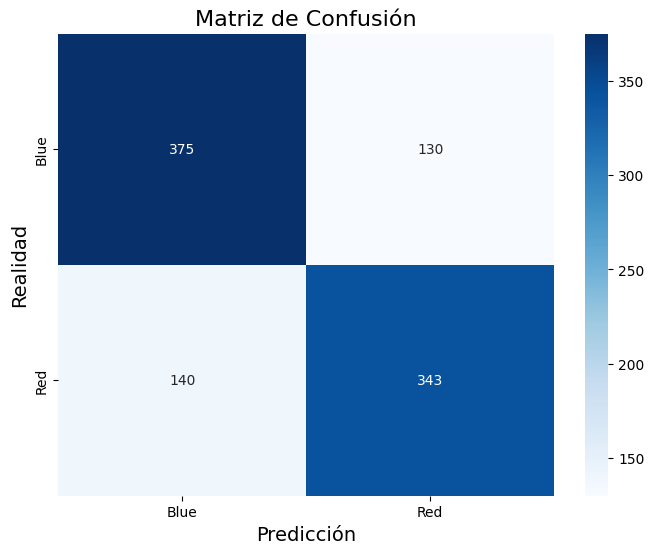

In [238]:
# Entrenar el modelo con el mejor C encontrado
final_model = SVC(kernel="linear", C=best_C, random_state=42)
final_model.fit(X_train, y_train)


y_pred_test = final_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Precisión en Test con C={best_C:.6f}: {accuracy_test:.2f}")


y_pred_test = final_model.predict(X_test)

accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)

print(f"Precisión en Test (Accuracy): {accuracy_test:.2f}")
print(f"Precisión (Precision): {precision_test:.2f}")
print(f"Recall (Sensibilidad): {recall_test:.2f}")

cm = confusion_matrix(y_test, y_pred_test)
print("\nMatriz de Confusión:")
print(cm)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Blue", "Red"], yticklabels=["Blue", "Red"])

# Personalizar
plt.title("Matriz de Confusión", fontsize=16)
plt.xlabel("Predicción", fontsize=14)
plt.ylabel("Realidad", fontsize=14)
plt.show()

Al analizar todos los resultados de las técnicas de Feature Selection, todos han obtenido resultados muy similares, incluso iguales. El único que tuvo un menor desempeño fue el de la regresión de Lasso. Sin embargo, con una diferencia minima de la presición en test, accuracy y en el recall que es de 0.01 porque los demás tienen valores de 0.73 en el accuracy, precision y recall, mientras este tiene 0.72. Este método es sencillo de entender. Mientras que el de la correlación de Pearson para un set de datos muy grandes es más ediciente computacionalmente, además de ser simple. Por lo tanto, se puede concluir que la correlación de Pearson y f_classif que se basa en la realción lineal entre las caracteristicas y la variable objetico son dos opciones muy buenas. A comparación de los resultados anteriormente obtenidos en el laboratorio pasado, también es una buena opción si se conoce bien el subconjunto.